<a href="https://colab.research.google.com/github/5234560002ebnida/nonfictioner/blob/main/fibonacci_bollinger_band_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Timeframe: day


/usr/lib/python3.10/html/parser.py:170: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


              Close         Basis   Upper 0.236   Upper 0.382     Upper 0.5  \
Date                                                                          
2012-05-17  55500.0           NaN           NaN           NaN           NaN   
2012-05-18  54300.0           NaN           NaN           NaN           NaN   
2012-05-21  53600.0           NaN           NaN           NaN           NaN   
2012-05-22  54800.0           NaN           NaN           NaN           NaN   
2012-05-23  53800.0           NaN           NaN           NaN           NaN   
...             ...           ...           ...           ...           ...   
2024-07-18  48750.0  44228.666667  46741.907608  48296.709207  49553.329678   
2024-07-19  47900.0  44267.750000  46778.980309  48332.538043  49588.153198   
2024-07-22  48000.0  44308.500000  46816.077884  48367.376066  49621.165008   
2024-07-23  47350.0  44346.500000  46851.958453  48401.945462  49654.674689   
2024-07-24  46250.0  44378.666667  46878.323717  484

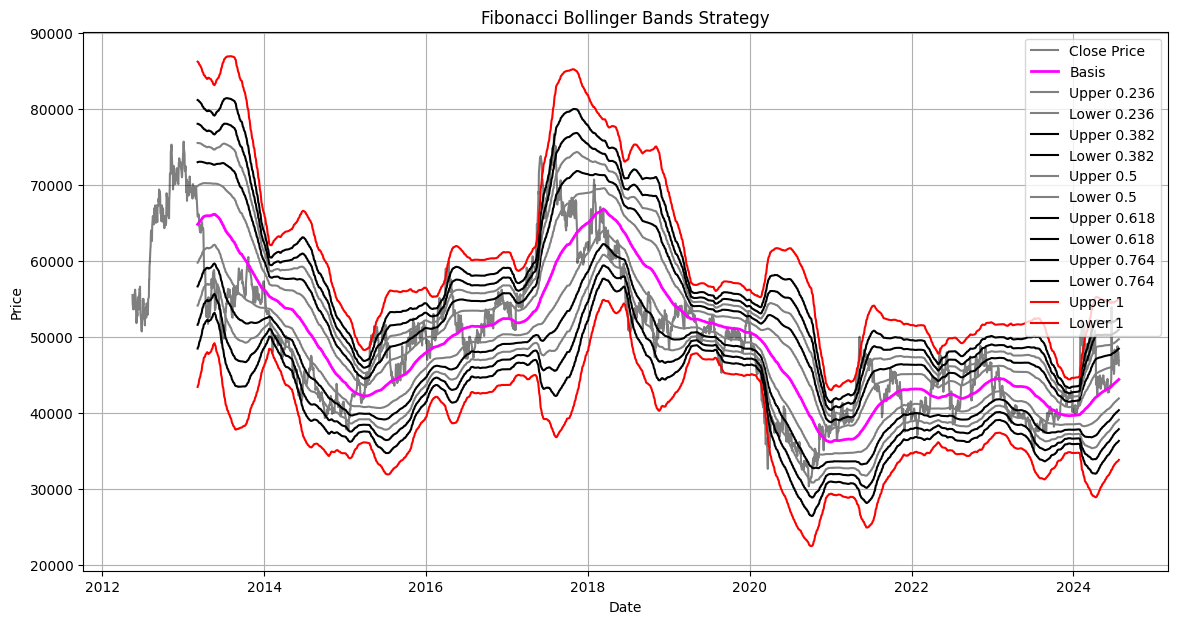


Timeframe: week


/usr/lib/python3.10/html/parser.py:170: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


              Close         Basis   Upper 0.236   Upper 0.382     Upper 0.5  \
Date                                                                          
2004-08-06  23400.0           NaN           NaN           NaN           NaN   
2004-08-13  22950.0           NaN           NaN           NaN           NaN   
2004-08-20  22200.0           NaN           NaN           NaN           NaN   
2004-08-27  22300.0           NaN           NaN           NaN           NaN   
2004-09-03  21500.0           NaN           NaN           NaN           NaN   
...             ...           ...           ...           ...           ...   
2024-06-28  46900.0  41895.500000  44668.325186  46383.717038  47770.129631   
2024-07-05  48300.0  41967.000000  44720.515724  46423.961893  47800.719755   
2024-07-12  46400.0  42033.250000  44764.553625  46454.258411  47819.910223   
2024-07-19  47900.0  42106.333333  44818.543681  46496.436523  47852.541696   
2024-07-24  46250.0  42184.666667  44852.689667  465

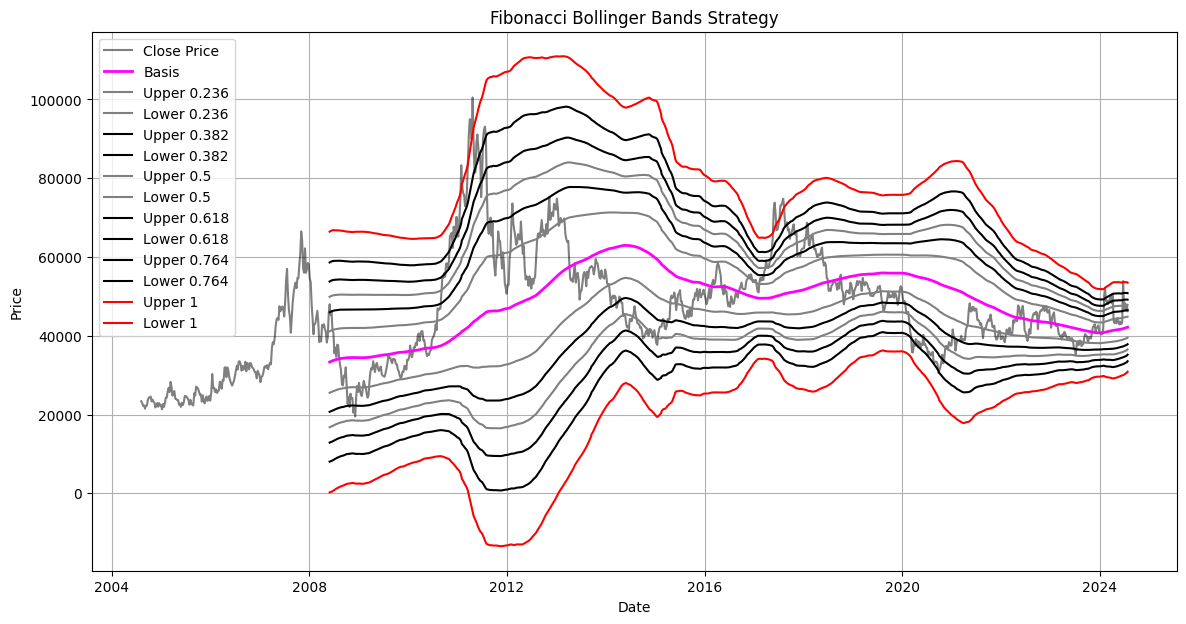


Timeframe: month


/usr/lib/python3.10/html/parser.py:170: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


              Close         Basis   Upper 0.236   Upper 0.382     Upper 0.5  \
Date                                                                          
2004-08-31  21600.0           NaN           NaN           NaN           NaN   
2004-09-30  24650.0           NaN           NaN           NaN           NaN   
2004-10-29  23800.0           NaN           NaN           NaN           NaN   
2004-11-30  22550.0           NaN           NaN           NaN           NaN   
2004-12-30  22400.0           NaN           NaN           NaN           NaN   
...             ...           ...           ...           ...           ...   
2024-03-29  48250.0  49435.083333  58501.619739  64110.578703  68643.846906   
2024-04-30  44900.0  49432.416667  58499.414930  64108.659619  68642.158751   
2024-05-31  43600.0  49392.750000  58463.264934  64074.685189  68609.942656   
2024-06-28  46900.0  49336.250000  58390.582739  63991.991976  68519.158346   
2024-07-24  46250.0  49260.333333  58292.632036  638

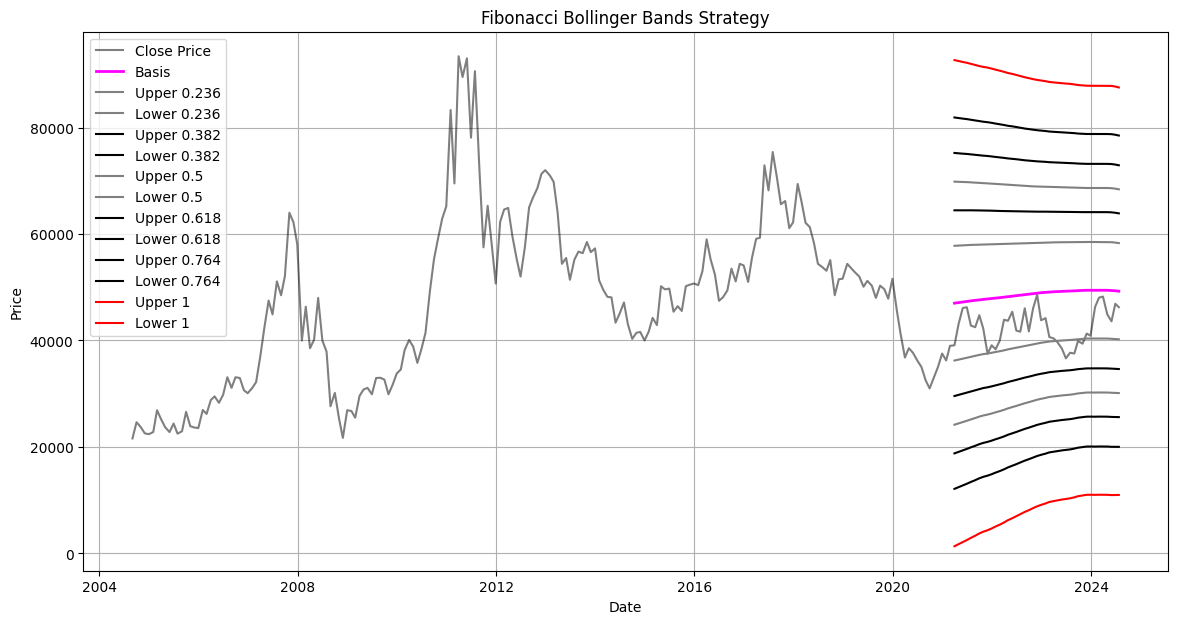

In [15]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

def get_price(symbol, startTime, endTime, timeframe='day'):
    count = 3000
    url = f"https://fchart.stock.naver.com/sise.nhn?symbol={symbol}&timeframe={timeframe}&count={count}&requestType=0"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    items = soup.select('item')

    data = []
    for item in items:
        fields = item['data'].split('|')
        if len(fields) < 6:
            continue
        try:
            date = pd.to_datetime(fields[0], format='%Y%m%d')
            data.append([date, float(fields[1]), float(fields[2]), float(fields[3]), float(fields[4]), float(fields[5])])
        except ValueError:
            continue

    df = pd.DataFrame(data, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])
    df.set_index('Date', inplace=True)

    return df

def calculate_fibonacci_bollinger_bands(data, length=200, mult=3.0):
    hlc3 = (data['High'] + data['Low'] + data['Close']) / 3
    basis = hlc3.rolling(window=length).mean()
    dev = mult * hlc3.rolling(window=length).std()

    # Fibonacci 비율을 이용한 밴드 계산
    fib_ratios = [0.236, 0.382, 0.5, 0.618, 0.764, 1]
    bands = {}
    for ratio in fib_ratios:
        bands[f'Upper {ratio}'] = basis + (ratio * dev)
        bands[f'Lower {ratio}'] = basis - (ratio * dev)

    data['Basis'] = basis
    for key, value in bands.items():
        data[key] = value

    return data

def plot_fibonacci_bollinger_bands(data):
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['Close'], label='Close Price', color='black', alpha=0.5)
    plt.plot(data.index, data['Basis'], label='Basis', color='fuchsia', linewidth=2)

    # 각 밴드를 플로팅
    fib_ratios = [0.236, 0.382, 0.5, 0.618, 0.764, 1]
    colors = {
        0.236: 'gray',
        0.382: 'black',
        0.5: 'gray',
        0.618: 'black',
        0.764: 'black',
        1: 'red'
    }

    for ratio in fib_ratios:
        plt.plot(data.index, data[f'Upper {ratio}'], label=f'Upper {ratio}', color=colors.get(ratio, 'gray'))
        plt.plot(data.index, data[f'Lower {ratio}'], label=f'Lower {ratio}', color=colors.get(ratio, 'gray'))

    plt.title(f"Fibonacci Bollinger Bands Strategy")
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# 사용 예시
symbol = '078930'  # GS 종목코드
startTime = '20220501'
endTime = '20220518'

timeframes = ['day', 'week', 'month']
for timeframe in timeframes:
    print(f"\nTimeframe: {timeframe}")
    df = get_price(symbol, startTime, endTime, timeframe)
    df = calculate_fibonacci_bollinger_bands(df)
    print(df[['Close', 'Basis'] + [f'Upper {ratio}' for ratio in [0.236, 0.382, 0.5, 0.618, 0.764, 1]] + [f'Lower {ratio}' for ratio in [0.236, 0.382, 0.5, 0.618, 0.764, 1]]])
    plot_fibonacci_bollinger_bands(df)

